# **E-COMMERCE CUSTOMER CHURN**

---
## **Business Problem Understanding**

### Context

e-commerce company is a place where seller and costumer can do its transaction through website or mobile app. The Transaction can be from various category. the company gets profit from each trancsaction done by the costumer, the costumer growth is needed so the company can get more profit. the company wants to know the costumer churn, minimizing the company loss of income.    

### Problem Statement

The Company wants to know the costumer churn, so the loss of income can be minimized. For that reason,  the company needs to predict the costumer before the costumer really churn, so that the company can give the costumer the better services, like giving appealing promos. however, the promo should be given to the right person. By doing so, the company can avoid the loss of income from losing costumers 

### Goals

- Potential costumer churn prediction, so the promo given is on the right person
- Knowing the factor that affecting the costumer to churn to avoid loss of income

### Analytic Approach

- Finding the pattern that differentiate the costumer that will churn or not by analyzing the company data
- Doing prediction on costumer who will churn or not by doing classification model

### Metric Evaluation

- **(TP) True Positive**: Costumer predicted to churn and actually churn
- **(FP) False Positive**: Costumer predicted to churn, but actually not to churn
- **(FN) False Negative**: Costumer is predicted not to churn, but actually churn
- **(TN) True Negative**: costumer is predicted not to churn and actually not to churn

Fault that might happen in doing prediction:

**Type 1 error**: False Positive 
- Action: Giving promotion with estimated cost *$150* per capita per year.
- Consequences: giving promotion to wrong target, creating inappropiate cost to the company

 **Type 2 error**: False Negative
- Action: Not giving attention to costumer predicted not to churn that could give profit up to *$600* per capita per year. 
- Consequences: Company is losing income because losing costumer

Because the probability of false prediction above, the model created should be able to minimized the company loss of income from losing of costumers by surpressing the false negative, so the company can be maintained to avoid inappropriate cost in giving promotion (avoid false positive). by that reason, `F2 score` will be used.

F2 score is one of evaluation metrics for classification that measuring model accuracy by considering trade off between precision and recall. F2 score based on beta score where if beta score is bigger than 1, it will lead to recall instead of precision. F2 score can be used to evaluate classification model perfromance where mistake from false negative is more considerable than to avoid than false positive.

### Dataset

**Dataset E-commerce Customer Churn**

   The dataset will be used is data_ecommerce_customer_churn.csv. However, there's any data similar with this dataset with more column/feature. The owner of the data is Ankit Verma and the address source on the internet is in the following link.

 https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction
 
**Target and Features**

Target : 
- 0 : Not Churn Costumer
- 1 : Churn costumer

| Feature | Description |
| --- | --- |
| Tenure | Tenure of a customer in the company |
| WarehouseToHome | Distance between the warehouse to the customer’s home |
| NumberOfDeviceRegistered | Total number of devices is registered on a particular customer |
| PreferedOrderCat | Preferred order category of a customer in the last month |
| SatisfactionScore | Satisfactory score of a customer on service |
| MaritalStatus | Marital status of a customer |
| NumberOfAddress | Total number of address on a particular customer |
| Complaint | Any complaint has been raised in the last month |
| DaySinceLastOrder | Day since last order by customer |
| CashbackAmount | Average cashback in last month |


---
## **Data Understanding**

### Import Library

In [1]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import PolynomialFeatures

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Algorithm ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Crossval
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score, make_scorer

# Explainable ML
import shap

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

### Load Dataset

In [2]:
df = pd.read_csv("data_ecommerce_customer_churn.csv")
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


### Explore Dataset

Knowing information of how many and type of the data:

In [3]:
df.info()

# There are missing values and numerical data type (float64, int64) and categorical (object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


Summary of Descriptive statistic in nummerical and categorical column:

In [4]:
display(df.describe(), df.describe(include='object'))

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


Finding missing value in every column:

In [5]:
df.isna().sum()

# There are missing values on Tenure, WarehouseToHome, DaySinceLastOrder column

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

dataframe line and column of df :

In [6]:
df.shape

# there are 3941 of line and 11 of column

(3941, 11)

Percentage of duplicated data:

In [7]:
df.duplicated().sum() / len(df) * 100

# 17% of data are duplicated

17.026135498604415

Deleting duplicated data and knowing the dataframe shape of df after deleting:

In [8]:
# Deleting duplicated data
df = df.drop_duplicates()

# Dataframe shape after deleting
df.shape

# 3270 line and 11 column

(3270, 11)

Unique data in every column:

In [9]:
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Tenure,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,3,"[Single, Married, Divorced]"
6,NumberOfAddress,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,2,"[0, 1]"
8,DaySinceLastOrder,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


knowing how many categorical column:

In [10]:
cat_features = [feature for feature in df.columns if (df[feature].dtypes == 'O')]
cat_features

# 2 categorical column 

['PreferedOrderCat', 'MaritalStatus']

Knowing how many numerical column:

In [11]:
num_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['Churn']))]
num_features

# 8 Numerical column

['Tenure',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder',
 'CashbackAmount']

Knowing how many category and unique value of categorical column:

In [12]:
for i in cat_features:
    print(f'Total unique values in {i}: ', df[i].nunique())
    print(f'Unique values: ', df[i].unique())
    print()

Total unique values in PreferedOrderCat:  6
Unique values:  ['Laptop & Accessory' 'Mobile' 'Fashion' 'Others' 'Mobile Phone' 'Grocery']

Total unique values in MaritalStatus:  3
Unique values:  ['Single' 'Married' 'Divorced']



Changing Mobile category into Mobile Phone in PreferedOrderCat column :

In [13]:
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})

Mobile category no longer exist, PreferedOrderCat is know became 5 category instead of 6 category

In [14]:
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    1213
Mobile Phone          1183
Fashion                484
Grocery                241
Others                 149
Name: PreferedOrderCat, dtype: int64

Finding outliers in numerical column using boxplot:

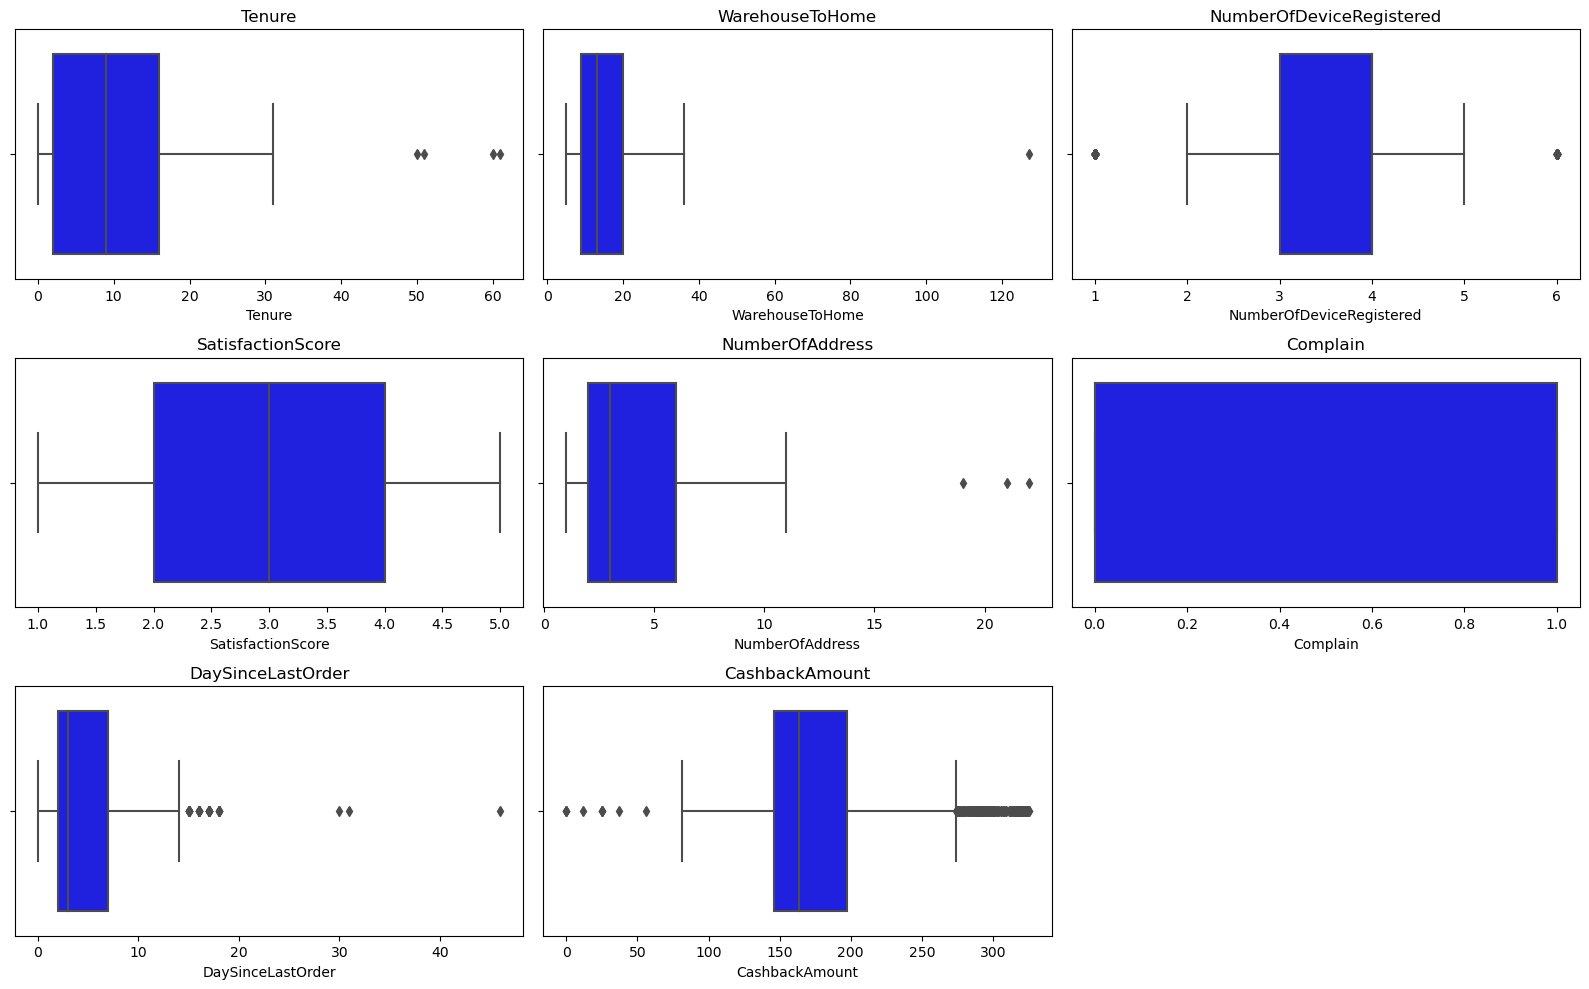

In [15]:
col_names = num_features
plotnumber = 1
plt.figure(figsize=(16,10))

for kolom in col_names:
    plt.subplot(3,3, plotnumber)
    sns.boxplot(data=df, x=kolom, color='blue')
    plt.title(kolom)
    plt.tight_layout()

    plotnumber += 1

According to the boxplot, we can know that there is outliers data exist. However, because the data is still consider to be normal or not error data, the data is not to be deleted and still can be used. those outliers can help the model to learn from various data.

Finding Relation between categorical features:

In [16]:
df.corr()[0:8]

# there are no strong relation between features 
# all features has correlation < 0.5

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
Tenure,1.000000,-0.028010,-0.041742,-0.029982,0.227957,-0.020666,0.170329,0.464551,-0.348654
WarehouseToHome,-0.028010,1.000000,0.015884,0.007628,-0.010757,0.046227,0.018332,-0.006126,0.074237
NumberOfDeviceRegistered,-0.041742,0.015884,1.000000,-0.010991,0.076437,0.005338,0.010831,0.120136,0.109612
SatisfactionScore,-0.029982,0.007628,-0.010991,1.000000,0.042449,-0.035167,0.039855,0.006499,0.098393
NumberOfAddress,0.227957,-0.010757,0.076437,0.042449,1.000000,-0.011490,-0.062229,0.186623,0.046354
Complain,-0.020666,0.046227,0.005338,-0.035167,-0.011490,1.000000,-0.052269,-0.002040,0.262278
DaySinceLastOrder,0.170329,0.018332,0.010831,0.039855,-0.062229,-0.052269,1.000000,0.340341,-0.147918
CashbackAmount,0.464551,-0.006126,0.120136,0.006499,0.186623,-0.002040,0.340341,1.000000,-0.151475


Observing the data distribution to see the data is normally distributed or not:

Text(0.5, 0.98, 'Frequency Distribution of Tenure, Warehouse to Home, Day Since Last Order')

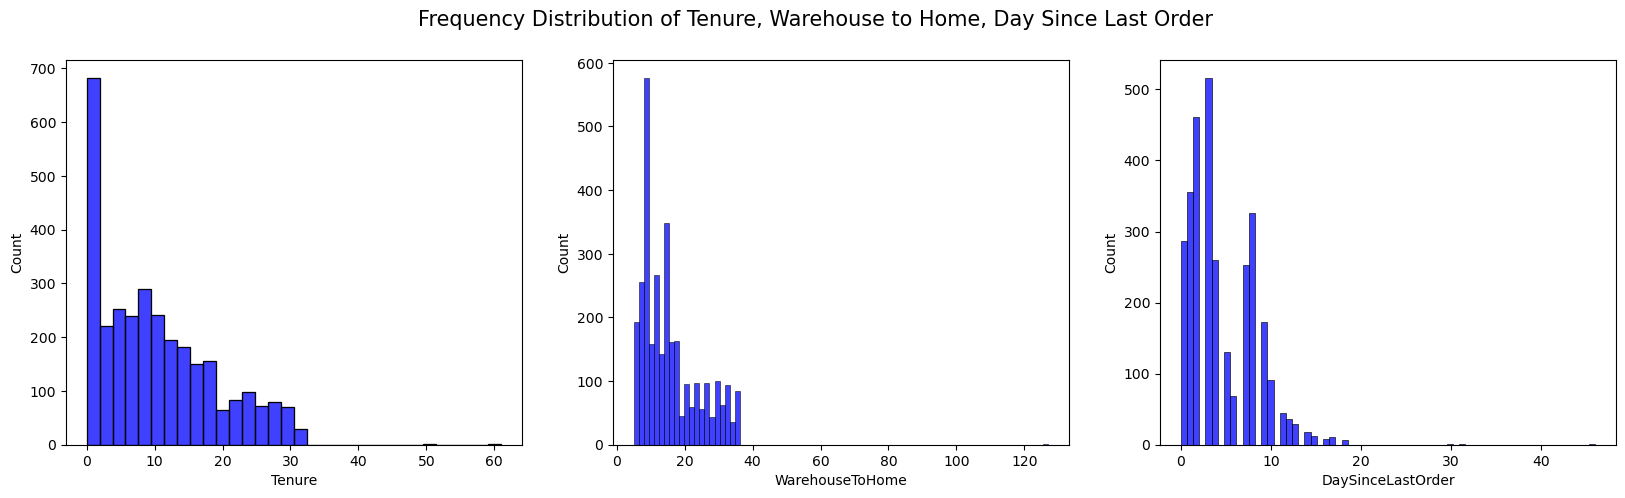

In [17]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.histplot(data=df, x='Tenure', color='blue')

plt.subplot(1,3,2)
sns.histplot(data=df, x='WarehouseToHome', color='blue')

plt.subplot(1,3,3)
sns.histplot(data=df, x='DaySinceLastOrder', color='blue')

plt.suptitle('Frequency Distribution of Tenure, Warehouse to Home, Day Since Last Order', size= 15)

# Tenure, WarehouseToHome, DaySinceLastOrder are not normally distributed

Knowing Target (churn) proportion:

In [18]:
print(df['Churn'].value_counts())
print()

# persentage
print(df['Churn'].value_counts()/len(df['Churn'])*100)

0    2736
1     534
Name: Churn, dtype: int64

0    83.669725
1    16.330275
Name: Churn, dtype: float64


According : https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data 
we can know that the target in this dataset has proportion of minority class of 16.3% **Moderate Imbalance**


---
## **Data Splitting**

Data splitting is important in machine learning to improve model perfromance and avoid overfitting, by splitting dataset into 2 or more part for certain purposes, like model training, model validation and model testing. 

Data Splitting is to evaluate model performance by using unused data in model training, choosing the best parameter and evaluate trained data.

Dataset is splitted into 3 part, there are training dataset, validation dataset, and testing dataset. Training dataset used for train model, validation dataset are used for choosing best paramater for the model, testing dataset are used for testing model performance. This will avoid overfitting, where the model are to complex and unable to generalize well on the data never seen before.

Define X (features) and y (target) :

In [19]:
# features
X = df.drop(columns=['Churn'])

# target
y = df['Churn']

Data Splitting :

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# data train = 80%
# data test = 20%

---
## **Preprocessing**

the steps in doing Preprocessing is by doing **impute missing values** , **scaling** (transformed numerical data to have same scale)m, **encoding** (changing categorical data into numerical data), and **polynomial features**

**Impute Missing Values**

Using Simple Imputer with Median: *'Tenure', 'WarehouseToHome', 'DaySinceLastOrder'*

On the data explore phase above, we can know that feature 'Tenure', 'WarehouseToHome' and 'DaySinceLastOrder', there are missing values and not normally distributed, so imputation is done using Median. those column is numerical features without relation with other features, shown by correlation of <0.5, so impattion is done with simple imputer, and not using other feature to predict missing values. 

**Scaling**

Using Robust Scaler: *'Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount'*

Those Numerical features has outliers, so Robust Scaler can be used to handle outliers.'Complain' feature has 0 and 1, so no need to be scaled anymore.
**Encoding**

Using One Hot Encoder: *'PreferedOrderCat', 'MaritalStatus'*

On data explore data, we can know that data inside 'PreferedOrderCat' and 'MaritalStatus' feature are categorical, encoding need to be done to change it into numericals. Encoding is done by One Hot Encoder becaus that categorical features doesn't have unordinal levelling  with a little unique data. 'PreferedOrderCat' has 5 unique data, and'MaritalStatus' has 3 unique data.

**Polynomial**

Doing polynomial by changing features into higher polynomial, so the model performance will improved.

In [21]:
pipe_impute_robust = Pipeline([
    ('median', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', RobustScaler())
])

In [22]:
transformer = ColumnTransformer([
    ('pipe_impute_robust', pipe_impute_robust, ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']),
    ('onehot', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_impute_robust',
                                 Pipeline(steps=[('median',
                                                  SimpleImputer(strategy='median')),
                                                 ('poly', PolynomialFeatures()),
                                                 ('scaler', RobustScaler())]),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'DaySinceLastOrder', 'CashbackAmount']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['PreferedOrderCat', 'MaritalStatus'])])

---
## **Benchmark Model**

In [23]:
# algoritma ML
logreg = LogisticRegression(random_state=0, class_weight='balanced')
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0, class_weight='balanced') 
rf = RandomForestClassifier(random_state=0, class_weight='balanced') 
ada = AdaBoostClassifier(tree, random_state=0)
gbc = GradientBoostingClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0, verbosity=0, class_weight='balanced')

In [24]:
# resampler
smote = SMOTE(random_state=0)
nearmiss = NearMiss()
rus = RandomUnderSampler(random_state=0)
ros = RandomOverSampler(random_state=0)

In [25]:
models = [logreg, knn, tree, rf, ada, gbc, xgbc]
score = []
list_mean = []
list_std = []

# evaluation matrics f2 score
f2_score = make_scorer(fbeta_score, beta=2)

# finding best algorithm by observing mean and deviations from f2 score
for i in models:

    pipe_model = Pipeline([
        ('transformer', transformer),
        ('resampler', smote),
        ('model', i)
    ])

    model_cv = cross_val_score(
        estimator = pipe_model, 
        X= X_train, 
        y= y_train, 
        cv=5, 
        scoring= f2_score, 
        error_score='raise'
        )

    score.append(model_cv)
    list_mean.append(model_cv.mean())
    list_std.append(model_cv.std())

In [26]:
# creating data frame mean and std from every looped algorithm
df_cv = pd.DataFrame({
    'model':['logreg', 'knn', 'tree', 'rf',' ada', 'gbc', 'xgbc'],
    'mean':list_mean,
    'std':list_std
})

# sorting by highest mean score
df_cv.sort_values(by='mean', ascending=False)

,model,mean,std
6,xgbc,0.707902,0.041326
3,rf,0.702343,0.047570
1,knn,0.686803,0.027228
0,logreg,0.677700,0.034660
5,gbc,0.655146,0.021299
2,tree,0.649341,0.036276
4,ada,0.634491,0.061782


according to DataFrame df_cv, we can know that from six looped algorithm, `XGBoost Classifier` and `Random Forest` are the best algorithm, shown by mean score that also quite stable. for that reason, both algorithm will be tuned to get its best parameter using f2 score.

---
## **Hyperparameter Tuning**

Hyperparameter tuning is done to improve model performance by finding optimal hyperparameter. 

Hyperparameter tuning function:

- improve model performance, by determining optimal hyperparameter, so the model will be accurate and efficient.

- avoid overfitting and underfitting 

- improve generalization, to able predict new data

- Saving time and cost

Hyperparameter tuning is using `Random Search` by choosing best hyperparameter by random from define range.

### XGBoost Classifier

First Tuning

In [27]:
# Hyperparam space XGboost
hyperparam_space_xgbc = {
    'balancing':[smote, rus, ros, nearmiss, None],
    'model__max_depth': list(np.arange(1,100,2)), 
    'model__learning_rate': list(np.arange(0.01, 1.0, 0.01)),
    'model__n_estimators': list(np.arange(50,100,2)),
    'model__subsample': list(np.arange(0.1, 1.0, 0.1)),
    'model__colsample_bytree': list(np.arange(0.1, 1.0, 0.1)),
    'transformer__pipe_impute_robust__scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()],
    'transformer__pipe_impute_robust__poly__degree': [1,2,3]
}

In [28]:
# Benchmark model 1
xgbc = XGBClassifier(random_state=0, verbosity=0, class_weight='balanced')

# Create the algorithm chains
pipe_model = Pipeline([
        ('transformer', transformer),
        ('balancing', smote), 
        ('model', xgbc)
        ])

# Hyperparameter tuning
random_xgbc = RandomizedSearchCV(
    estimator = pipe_model, 
    param_distributions = hyperparam_space_xgbc, 
    cv = 5, 
    scoring = f2_score, 
    n_jobs = -1,  
    random_state=0,
    n_iter= 1000
)

In [29]:
# fitting
random_xgbc.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_impute_robust',
                                                                               Pipeline(steps=[('median',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('poly',
                                                                                                PolynomialFeatures()),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',
                                                                                'NumberOfAddre...
                                                                58, 60, 62, 64,
                                                                66, 68, 70, 72,
                                                                74, 76, 78, 80,
                                                                82, 84, 86, 88,
                                                                90, 92, 94, 96,
                                                                98],
                                        'model__subsample': [0.1, 0.2,
                                                             0.30000000000000004,
                                                             0.4, 0.5, 0.6,
                                                             0.7000000000000001,
                                                             0.8, 0.9],
                                        'transformer__pipe_impute_robust__poly__degree': [1,
                                                                                          2,
                                                                                          3],
                                        'transformer__pipe_impute_robust__scaler': [MinMaxScaler(),
                                                                                    StandardScaler(),
                                                                                    RobustScaler()]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [30]:
# create dataframe
pd.DataFrame(random_xgbc.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_transformer__pipe_impute_robust__scaler,param_transformer__pipe_impute_robust__poly__degree,param_model__subsample,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__colsample_bytree,param_balancing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
973,0.365255,0.016035,0.033604,0.001745,RobustScaler(),1,0.7,90,45,0.1,0.7,RandomUnderSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': Ro...,0.821355,0.751029,0.744681,0.734694,0.784114,0.767175,0.031762,1
552,1.137137,0.088253,0.035602,0.006218,RobustScaler(),1,0.8,78,89,0.06,0.7,RandomOverSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': Ro...,0.807175,0.727700,0.753589,0.770115,0.776471,0.767010,0.026221,2
209,0.321226,0.006676,0.027600,0.004963,RobustScaler(),2,0.8,74,59,0.23,0.6,RandomUnderSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': Ro...,0.771543,0.757576,0.756303,0.712810,0.833333,0.766313,0.038880,3
556,0.535737,0.011881,0.020800,0.002639,StandardScaler(),1,0.6,56,47,0.36,0.7,RandomOverSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': St...,0.800915,0.742925,0.736715,0.749415,0.794931,0.764980,0.027262,4
453,0.750588,0.158194,0.026804,0.006046,StandardScaler(),2,0.9,90,51,0.09,0.8,RandomUnderSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': St...,0.797980,0.755694,0.738397,0.740741,0.791075,0.764777,0.025101,5


In [31]:
print('XGBoost')
print('Best_score:', random_xgbc.best_score_)
print('Best_params:', random_xgbc.best_params_)

XGBoost
Best_score: 0.7671745648583999
Best_params: {'transformer__pipe_impute_robust__scaler': RobustScaler(), 'transformer__pipe_impute_robust__poly__degree': 1, 'model__subsample': 0.7000000000000001, 'model__n_estimators': 90, 'model__max_depth': 45, 'model__learning_rate': 0.09999999999999999, 'model__colsample_bytree': 0.7000000000000001, 'balancing': RandomUnderSampler(random_state=0)}


Second Tuning

In [32]:
# Hyperparam space XGboost
hyperparam_space_xgbc = {
    'balancing':[rus, ros],
    'model__max_depth': list(np.arange(35,110,1)), 
    'model__learning_rate': list(np.arange(0.1, 0.5, 0.05)),
    'model__n_estimators': list(np.arange(50,100,1)),
    'model__subsample': list(np.arange(0.5, 1.0, 0.05)),
    'model__colsample_bytree': list(np.arange(0.5, 1.0, 0.05)),
    'transformer__pipe_impute_robust__scaler': [StandardScaler(), RobustScaler()],
    'transformer__pipe_impute_robust__poly__degree': [1,2]
}

In [33]:
# Benchmark model 1
xgbc = XGBClassifier(random_state=0, verbosity=0, class_weight='balanced')

# Create the algorithm chains
pipe_model = Pipeline([
        ('transformer', transformer),
        ('balancing', smote), 
        ('model', xgbc)
        ])

# Hyperparameter tuning
random_xgbc = RandomizedSearchCV(
    estimator = pipe_model, 
    param_distributions = hyperparam_space_xgbc, 
    cv = 5, 
    scoring = f2_score, 
    n_jobs = -1,  
    random_state=0,
    n_iter= 1000
)

In [34]:
# fitting
random_xgbc.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_impute_robust',
                                                                               Pipeline(steps=[('median',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('poly',
                                                                                                PolynomialFeatures()),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',
                                                                                'NumberOfAddre...
                                        'model__subsample': [0.5, 0.55,
                                                             0.6000000000000001,
                                                             0.6500000000000001,
                                                             0.7000000000000002,
                                                             0.7500000000000002,
                                                             0.8000000000000003,
                                                             0.8500000000000003,
                                                             0.9000000000000004,
                                                             0.9500000000000004],
                                        'transformer__pipe_impute_robust__poly__degree': [1,
                                                                                          2],
                                        'transformer__pipe_impute_robust__scaler': [StandardScaler(),
                                                                                    RobustScaler()]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [35]:
# create dataframe
pd.DataFrame(random_xgbc.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_transformer__pipe_impute_robust__scaler,param_transformer__pipe_impute_robust__poly__degree,param_model__subsample,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__colsample_bytree,param_balancing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
704,0.147011,0.006957,0.018801,0.000749,StandardScaler(),1,0.95,78,105,0.35,0.7,RandomUnderSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': St...,0.797546,0.786164,0.774194,0.757576,0.774793,0.778054,0.013346,1
276,0.745854,0.019661,0.029205,0.000979,StandardScaler(),2,0.95,96,76,0.15,0.8,RandomUnderSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': St...,0.797980,0.766046,0.730689,0.773196,0.802846,0.774151,0.025872,2
11,0.339027,0.028826,0.034004,0.002966,StandardScaler(),1,0.9,83,109,0.15,0.85,RandomUnderSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': St...,0.804829,0.757261,0.752119,0.772358,0.781893,0.773692,0.018836,3
483,0.319738,0.027862,0.029602,0.001855,StandardScaler(),1,0.95,71,94,0.1,0.75,RandomUnderSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': St...,0.809717,0.757261,0.734043,0.769231,0.797546,0.773559,0.027308,4
543,0.606407,0.050653,0.030603,0.002654,StandardScaler(),2,0.95,85,40,0.15,0.6,RandomUnderSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': St...,0.791075,0.759754,0.755319,0.758197,0.802469,0.773363,0.019502,5


In [36]:
print('XGBoost')
print('Best_score:', random_xgbc.best_score_)
print('Best_params:', random_xgbc.best_params_)

XGBoost
Best_score: 0.7780544457350247
Best_params: {'transformer__pipe_impute_robust__scaler': StandardScaler(), 'transformer__pipe_impute_robust__poly__degree': 1, 'model__subsample': 0.9500000000000004, 'model__n_estimators': 78, 'model__max_depth': 105, 'model__learning_rate': 0.3500000000000001, 'model__colsample_bytree': 0.7000000000000002, 'balancing': RandomUnderSampler(random_state=0)}


XGBoost algorithm done by twice tuning. First Tuning are able to improve best score model from before tuned model. Second Tuning are done by narrowing the range from available parameter, setting best parameters from the first tuning, best score from second tuning are also improving.

### Random Forest

First Tuning

In [37]:
# Hyperparam space Random Forest
hyperparam_space_rf = {
    'balancing':[smote, rus, ros, nearmiss, None],
    'model__max_depth': list(np.arange(1,100,2)), 
    'model__n_estimators': list(np.arange(1,100,2)),
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__min_samples_leaf': list(np.arange(1,100,2)),
    'model__min_samples_split': list(np.arange(1,100,2)),
    'transformer__pipe_impute_robust__scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()],
    'transformer__pipe_impute_robust__poly__degree': [1,2,3]
}

In [38]:
# Benchmark model 2
rf = RandomForestClassifier(random_state=0, class_weight='balanced') 

# Create the algorithm chains
pipe_model = Pipeline([
        ('transformer', transformer),
        ('balancing', smote), 
        ('model', rf)
        ])

# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator = pipe_model, 
    param_distributions = hyperparam_space_rf, 
    cv = 5, 
    scoring = f2_score, 
    n_jobs = -1,  
    random_state=0,
    n_iter= 1000
)

In [39]:
# fitting
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_impute_robust',
                                                                               Pipeline(steps=[('median',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('poly',
                                                                                                PolynomialFeatures()),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',
                                                                                'NumberOfAddre...
                                                                     39, 41, 43,
                                                                     45, 47, 49,
                                                                     51, 53, 55,
                                                                     57, 59, ...],
                                        'model__n_estimators': [1, 3, 5, 7, 9,
                                                                11, 13, 15, 17,
                                                                19, 21, 23, 25,
                                                                27, 29, 31, 33,
                                                                35, 37, 39, 41,
                                                                43, 45, 47, 49,
                                                                51, 53, 55, 57,
                                                                59, ...],
                                        'transformer__pipe_impute_robust__poly__degree': [1,
                                                                                          2,
                                                                                          3],
                                        'transformer__pipe_impute_robust__scaler': [MinMaxScaler(),
                                                                                    StandardScaler(),
                                                                                    RobustScaler()]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [40]:
# create dataframe
pd.DataFrame(random_rf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_transformer__pipe_impute_robust__scaler,param_transformer__pipe_impute_robust__poly__degree,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,param_balancing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
468,0.756923,0.012836,0.052806,0.001165,MinMaxScaler(),1,67,9,9,auto,29,RandomOverSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': Mi...,0.791757,0.728261,0.742358,0.764192,0.766739,0.758661,0.021823,1
69,0.642300,0.016598,0.056747,0.006968,RobustScaler(),1,59,37,3,sqrt,53,RandomOverSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': Ro...,0.808190,0.703463,0.736264,0.753275,0.788337,0.757906,0.037171,2
781,1.077497,0.020382,0.048204,0.006242,MinMaxScaler(),2,89,1,9,log2,33,RandomOverSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': Mi...,0.793478,0.701559,0.720824,0.775281,0.736607,0.745550,0.034081,3
42,0.536638,0.026485,0.058405,0.008870,MinMaxScaler(),1,39,55,13,sqrt,9,RandomOverSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': Mi...,0.753138,0.706638,0.737179,0.752119,0.748441,0.739503,0.017381,4
232,0.466266,0.045399,0.039402,0.001743,StandardScaler(),1,37,49,13,log2,53,RandomOverSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': St...,0.756303,0.699153,0.724947,0.752119,0.750529,0.736610,0.021731,5


In [41]:
print('Random Forest')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

Random Forest
Best_score: 0.7586613597408993
Best_params: {'transformer__pipe_impute_robust__scaler': MinMaxScaler(), 'transformer__pipe_impute_robust__poly__degree': 1, 'model__n_estimators': 67, 'model__min_samples_split': 9, 'model__min_samples_leaf': 9, 'model__max_features': 'auto', 'model__max_depth': 29, 'balancing': RandomOverSampler(random_state=0)}


Secong Tuning

In [42]:
# Hyperparam space Random Forest
hyperparam_space_rf = {
    'balancing':[smote, rus, ros, None],
    'model__max_depth': list(np.arange(15,80,1)), 
    'model__n_estimators': list(np.arange(1,100,1)),
    'model__max_features': ['auto'],
    'model__min_samples_leaf': list(np.arange(1,85,1)),
    'model__min_samples_split': list(np.arange(35,120,1)),
    'transformer__pipe_impute_robust__scaler': [MinMaxScaler(), RobustScaler()],
    'transformer__pipe_impute_robust__poly__degree': [1,2,3]
}

In [43]:
# Benchmark model 2
rf = RandomForestClassifier(random_state=0, class_weight='balanced') 

# Create the algorithm chains
pipe_model = Pipeline([
        ('transformer', transformer),
        ('balancing', smote), 
        ('model', rf)
        ])

# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator = pipe_model, 
    param_distributions = hyperparam_space_rf, 
    cv = 5, 
    scoring = f2_score, 
    n_jobs = -1,  
    random_state=0,
    n_iter= 1000
)

In [44]:
# fitting
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_impute_robust',
                                                                               Pipeline(steps=[('median',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('poly',
                                                                                                PolynomialFeatures()),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Tenure',
                                                                                'WarehouseToHome',
                                                                                'NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',
                                                                                'NumberOfAddre...
                                                                     47, 48, 49,
                                                                     50, 51, 52,
                                                                     53, 54, 55,
                                                                     56, 57, 58,
                                                                     59, 60, 61,
                                                                     62, 63, 64, ...],
                                        'model__n_estimators': [1, 2, 3, 4, 5,
                                                                6, 7, 8, 9, 10,
                                                                11, 12, 13, 14,
                                                                15, 16, 17, 18,
                                                                19, 20, 21, 22,
                                                                23, 24, 25, 26,
                                                                27, 28, 29, 30, ...],
                                        'transformer__pipe_impute_robust__poly__degree': [1,
                                                                                          2,
                                                                                          3],
                                        'transformer__pipe_impute_robust__scaler': [MinMaxScaler(),
                                                                                    RobustScaler()]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [45]:
# create dataframe
pd.DataFrame(random_rf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_transformer__pipe_impute_robust__scaler,param_transformer__pipe_impute_robust__poly__degree,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,param_balancing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
57,0.784257,0.021180,0.064443,0.004056,MinMaxScaler(),1,69,57,5,auto,40,RandomOverSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': Mi...,0.778252,0.718816,0.741935,0.752688,0.759494,0.750237,0.019661,1
884,0.946733,0.016136,0.071372,0.002841,MinMaxScaler(),1,89,41,9,auto,27,RandomOverSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': Mi...,0.783262,0.717345,0.725108,0.737527,0.769231,0.746495,0.025520,2
866,0.417631,0.010172,0.044404,0.002333,MinMaxScaler(),1,38,54,13,auto,60,RandomOverSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': Mi...,0.762004,0.702128,0.731183,0.748945,0.741525,0.737157,0.020190,3
750,0.537640,0.014924,0.042004,0.002830,MinMaxScaler(),1,99,37,6,auto,23,None,{'transformer__pipe_impute_robust__scaler': Mi...,0.750529,0.715789,0.720430,0.761803,0.736515,0.737013,0.017452,4
926,0.741678,0.074233,0.062206,0.006524,RobustScaler(),1,81,54,25,auto,46,RandomOverSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': Ro...,0.758836,0.703782,0.723542,0.742678,0.751566,0.736081,0.020008,5


In [46]:
print('Random Forest')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

Random Forest
Best_score: 0.7502369987200906
Best_params: {'transformer__pipe_impute_robust__scaler': MinMaxScaler(), 'transformer__pipe_impute_robust__poly__degree': 1, 'model__n_estimators': 69, 'model__min_samples_split': 57, 'model__min_samples_leaf': 5, 'model__max_features': 'auto', 'model__max_depth': 40, 'balancing': RandomOverSampler(random_state=0)}


Random Forest algorithm tuning are also done twice. First Tuning are able to improve pertama best score model from before tuned model. Second Tuning are done by narrowing the range from available parameter, setting best parameters from the first tuning, best score from second tuning are also improving.

### Best Model

Best score comparison between XGBoost and Random Forest, before and after tuning :

In [47]:
print(df_cv[df_cv['model']=='xgbc']['mean'].values[0], 'XGBoost Benchmark')
print(random_xgbc.best_score_, 'XGBoost Tuning')

print(df_cv[df_cv['model']=='rf']['mean'].values[0], 'Random Forest Benchmark')
print(random_rf.best_score_, 'Random Forest Tuning')

0.7079019658819716 XGBoost Benchmark
0.7780544457350247 XGBoost Tuning
0.7023430119545925 Random Forest Benchmark
0.7502369987200906 Random Forest Tuning


based on those two tuned algorithm, XGBoost has higher best score than Random Forest. for that reason, we will continue into modelling process into test by using XGBoost algorithm.

Best XGBoost parameter after second tuning:
- transformer__pipe_impute_robust__scaler : StandardScaler()
- transformer__pipe_impute_robust__poly__degree : 1
- model__subsample : 0.9500000000000004
- model__n_estimators : 78
- model__max_depth : 105
- model__learning_rate : 0.3500000000000001
- model__colsample_bytree : 0.7000000000000002
- balancing : RandomUnderSampler(random_state=0)


---
## **Performance in Test Set**

XGBoost (Extreme Gradient Boosting) are popular machine learning algorithm that used for classification, regression and ranking problem. XGBoost is gradient boosting library optimized for efficiency, flexibility and Transferable.

XGBoost are ensemble model type that using combination from weak model to create stronger model. . weaker model are usually from decision tree, created by sequence inside boosting process. During Boosting, every new tree will try to fix mistake from previous tree, so the model will get more accurate gradually. 

How XGBoost works for classification:

- Data Preparation: XGBoost need input data in certain formats. data needs to be in matrixes, where every line represent an instance and every column represent a feature. Target Variable need to be binary or categorical.
- Early Model: First Decision tree created using training data.

- Residual Calculation: Residual are calculate by reducing target score that being predicted from previous target score. This Residual will be used for target variable for next decision tree.

- Gradient boosting: Created for fixing previous decision tree mistake. 

- Tree pruning: Decision tree are cut to avoid overfitting. done by setting minimum sample needed.

- Prediction: after all decision tree are created, final prediction done by adding prediction from all trees. predicted score are  the class with highest probability.

- Regularization: XGBoost using regularization to avoid overfitting. regularization term added to objective function being optimized 

- Setting Hyperparameter: XGBoost has many hyperparameter that can be setting to improve model performance. This Hyperparameter including learning rate, number of trees, maximum depth of the trees, minimum number of samples required to be at a leaf node, etc.

- XGBoost known for its speed and accuracy.

Hyperparameter that been done from tuning:

- max_depth: Determining maximum depth in every tree. the bigger the value, the model will getting more complex and slower to train. however, to small value will create overfitting. 

- learning_rate: Determining how fast model will learn. smaller the value, the model will get slower to learn but more accurate.

- n_estimators: Number of trees that will be created inside algorithm. The bigger the value, the model will getting more complex and slower to train. 

- subsample: Determining data sample proportion used in every tree.  Menentukan proporsi sampel data yang digunakan untuk setiap tree. Smaller the value, fewer data will be used and training time will get faster, however if its to small, it will get overfitting. 

- colsample_bytree: Determining feature proportion that used in every tree. Smaller the value, fewer feature will be used and training time will get faster, however if its to small, it will get underfitting.

### Before Hyperparameter Tuning

In [48]:
model= XGBClassifier(random_state=0, verbosity=0, class_weight='balanced')

model_pipe = Pipeline([
    ('transformer', transformer),
    ('resampler', smote),
    ('model', model)
])

# fitting
model_pipe.fit(X_train, y_train)

# predict
y_pred = model_pipe.predict(X_test)

# f2 score score
f2score_xgbc_benchmark = fbeta_score(y_test, y_pred, beta=2)
f2score_xgbc_benchmark

0.7182835820895522

### After Hyperparameter Tuning

In [49]:
# best model
xgbc_tuning = random_xgbc.best_estimator_

# fitting
xgbc_tuning.fit(X_train, y_train)

# predict
y_pred_xgbc_tuning = xgbc_tuning.predict(X_test)

# f2 score
f2score_xgbc_tuning = fbeta_score(y_test, y_pred_xgbc_tuning, beta=2)
f2score_xgbc_tuning

0.7894736842105262

In [50]:
print(f2score_xgbc_benchmark, 'XGboost Benchmark')
print(f2score_xgbc_tuning, 'XGboost Tuning')

0.7182835820895522 XGboost Benchmark
0.7894736842105262 XGboost Tuning


### Confusion Matrix

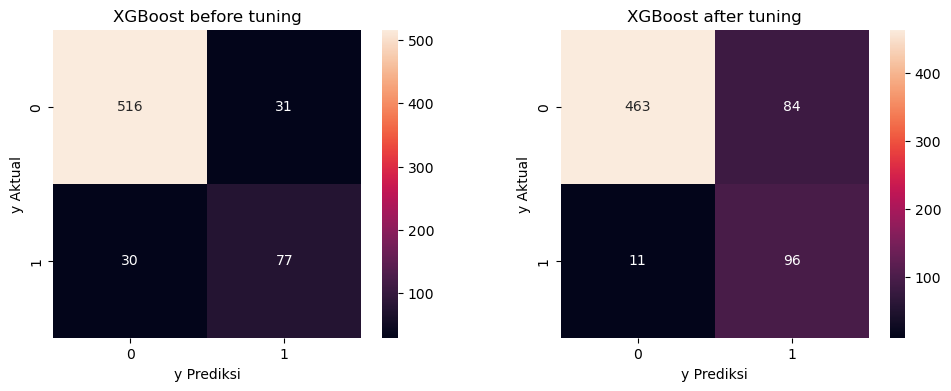

In [51]:
plt.figure(figsize=(12,4))

# Model XGBoost before tuning
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediction')
plt.ylabel('y Actual')
plt.title('XGBoost before tuning')

# Model XGBoost after tuning
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_xgbc_tuning), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediction')
plt.ylabel('y Actual')
plt.title('XGBoost after tuning');

The Purpose of this project is to know the costumer will churn or not, according to business problem,we can know:

- Model has probabillity to correctly predict churn and not churn costumer((TP+TN)/total) for 85.47%
- Model has probabillity to correctly predict churn costumer (TP/(TP+FN)) for 89.71%
- Error Rate is 14.52%

**Type 1 error**: False Positive 
- Action: Giving promotion with estimated cost *$150* per capita per year.
- Consequences: giving promotion to wrong target, creating inappropiate cost to the company

 **Type 2 error**: False Negative
- Action: Not giving attention to costumer predicted not to churn that could give profit up to *$600* per capita per year. 
- Consequences: Company is losing income because losing costumer
<br>
<br>
- Cost FP : $ 150
- Cost FN : $ 600

**Without Machine Learning**

Company can't know which costumer will churn, so the Company need to give promotion to all costumers to keep costumers. This creating bigger cost to the company to its promotion strategy.

- Company cost for promotion (TP+FP+TN+FN): $150 x 654 = $98,100
- On Target churn costumer promotion cost (TP+FN): $150 X 107 = $16,060

The company will create more promotion cost for: $98,100 - $16,060 = `$82,040`. With machine learning, the cost can be surpressed.

**With Machine Learning**

Promotion cost can be focused on churn costumer, based on prediction we can known:

- Cost of mistaken promotion to loyal costumer (FP): $150 x 84 = $12,600
- Cost of losing costumer due to unpredicted churn (FN): $600 X 11 = $6,600

Total Cost: $12,600 + $6,600 = `$19,200`

**LOSS OF INCOME ARE REDUCED AFTER USING MACHINE LEARNING**

- Before ML: $82,040
- After ML: $19,200

We can conclude using XGBoost algorithm twice tuning machine learning, are able to reduced loss of income up to `76.59%` --> (($82,040 - $19,200) / $82,040)


---
## **Summary**

According to XGBoost:

- Train Set:
   - Before tuning: 0.70
   - After tuning: 0.77

- Test Set:
   - Before tuning: 0.70
   - After tuning: 0.78


Hyperparameter tuning are able to improve  F2 Score on test set from XGBoost for 0.08. 
Model performance for 0.78 is good enough because f2 score on train and test set are not much different, and the false negative is 10% from class 1 total (churn). 

---
## **Explainable Machine Learning**

### Feature Importance

In [52]:
# See value dari features importance
xgbc_tuning['model'].feature_importances_

array([0.        , 0.18643306, 0.04730441, 0.03666269, 0.04375068,
       0.0632892 , 0.06057208, 0.0480593 , 0.03314517, 0.04618186,
       0.14539906, 0.01099807, 0.07325104, 0.05902387, 0.14592943],
      dtype=float32)

In [53]:
# Constanta = 1 from polynomial
xgbc_tuning['transformer'].transformers_[0][1][1].get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6'], dtype=object)

In [54]:
# features name based on transform process
feat_scale = xgbc_tuning['transformer'].transformers_[0][2]
feat_onehot = list(xgbc_tuning['transformer'].transformers_[1][1].get_feature_names_out())
feat_remainder = list(X.columns[xgbc_tuning['transformer'].transformers_[2][2]])

feat = [1] + feat_scale + feat_onehot + feat_remainder
feat

[1,
 'Tenure',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'DaySinceLastOrder',
 'CashbackAmount',
 'PreferedOrderCat_Grocery',
 'PreferedOrderCat_Laptop & Accessory',
 'PreferedOrderCat_Mobile Phone',
 'PreferedOrderCat_Others',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'Complain']

In [55]:
# data frame feature importance that are sequenced based on highest importance value
imp = pd.DataFrame({
    'feature':feat,
    'importance':xgbc_tuning['model'].feature_importances_
}).sort_values('importance', ascending=False)

imp

,feature,importance
1,Tenure,0.186433
14,Complain,0.145929
10,PreferedOrderCat_Mobile Phone,0.145399
12,MaritalStatus_Married,0.073251
5,NumberOfAddress,0.063289
6,DaySinceLastOrder,0.060572
13,MaritalStatus_Single,0.059024
7,CashbackAmount,0.048059
2,WarehouseToHome,0.047304
9,PreferedOrderCat_Laptop & Accessory,0.046182


Text(0.5, 1.0, 'Feature Importance')

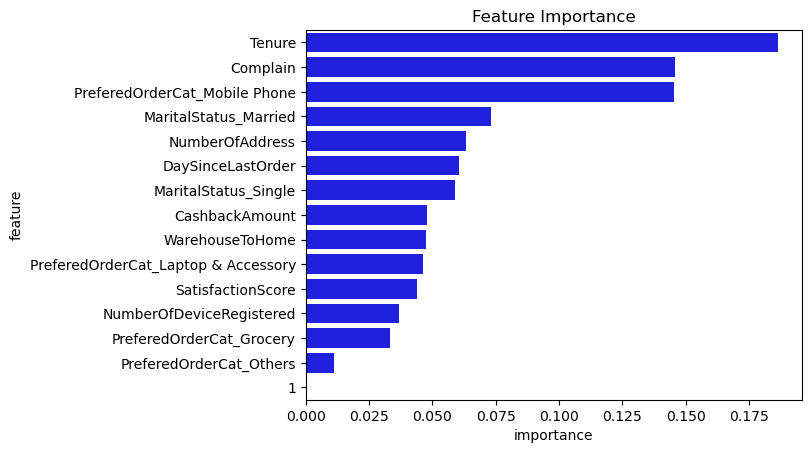

In [56]:
# creating barplot to visualized from feature importance
sns.barplot(data=imp, y='feature', x='importance', color='b')
plt.title('Feature Importance')

3 Features with highest importance value or have important influence to the costumer that will churn or not based on feature importance:
- Tenure, duration of the costumer using e-commmerce company
- Complain
- PreferedOrderCat_Mobile Phone, Costumer purchase category in one month

### Shapley Value of Explanations (SHAP)

In [57]:
my_model = xgbc_tuning[-1]
my_data = xgbc_tuning[0].fit_transform(X_train)

# define explainer
explainer = shap.TreeExplainer(
    model = my_model,
    data = my_data
)

# count shap value for every line in data train
shap_values = explainer.shap_values(my_data)


 96%|=================== | 2516/2616 [00:16<00:00]       

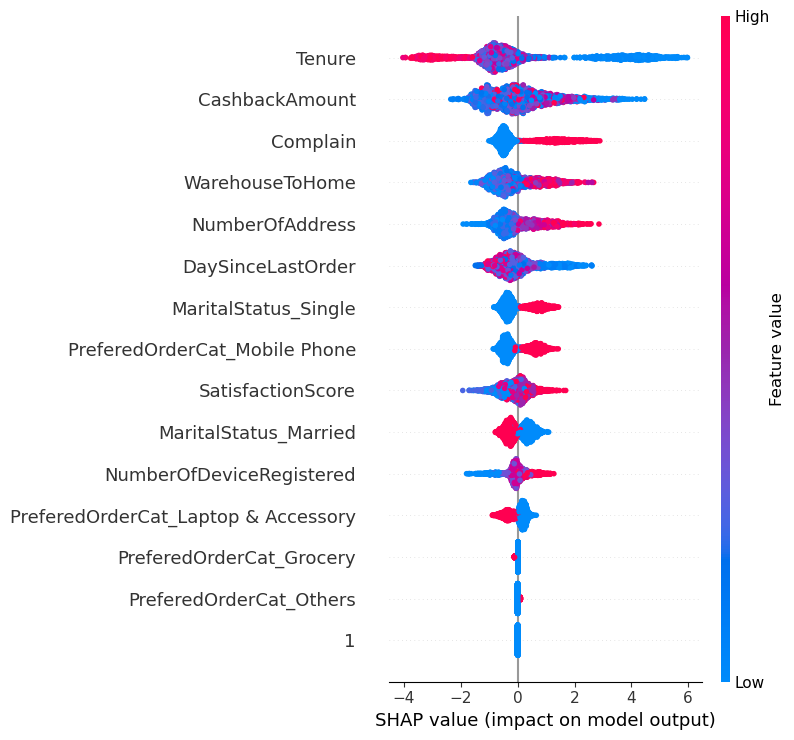

In [58]:
# show most important feature affect the churn
shap.summary_plot(shap_values, my_data, feature_names = feat)

3 Features that has important influence to costumer that will churn or not based on SHAP: 
- Tenure: The Longer costumer using this e-commerce company(higher tenure), the costumer most likely will not churn. with smaller tenure, costumer are most likely will churn.
- CashbackAmount: Lower the promotion number in cashback amount, the costumer most likely will churn.
- Complain: Customer that giving complains during last month, most likely will churn.

### Insights of Features Importance & SHAP combined

Through explainable ML, with using feature importance and SHAP, most influencing feature to influence costumer will churn is `Tenure` and `Complain`.

**Tenure**

<Axes: xlabel='Churn', ylabel='Tenure'>

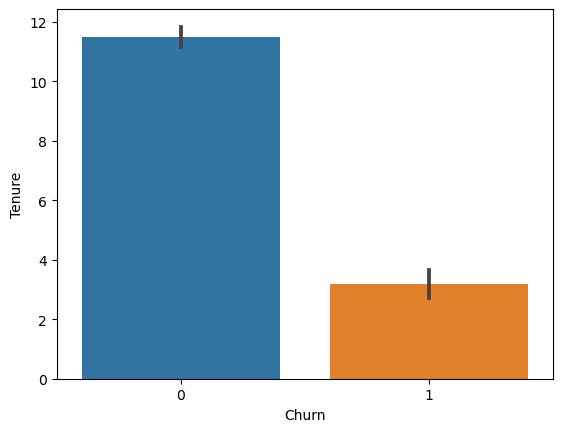

In [59]:
sns.barplot(x='Churn', y='Tenure', data=df)

Result from feature importance and SHAP, show that tenure are feature that will influence churn costumer or nut, supported by the barplot. costumer with low tenure average, most likely will churn. 

**Complain**

<Axes: xlabel='Churn', ylabel='Complain'>

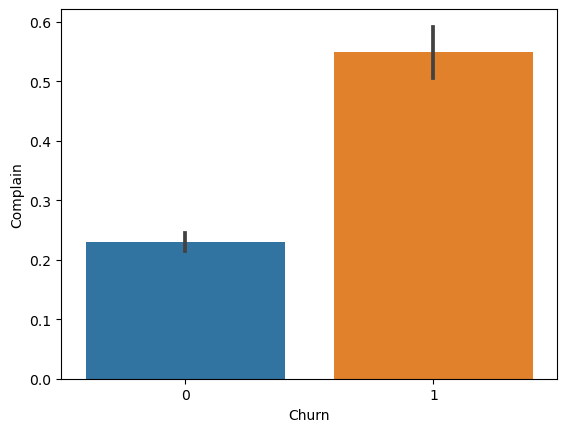

In [60]:
sns.barplot(x='Churn', y='Complain', data=df)

Result from feature importance and SHAP, show that Complain are feature that will influence churn costumer or nut, supported by the barplot. Customer with average to complain, most likely will churn.

---
## **Save Final Model**

### Save with Pickle
Pickle is one of library that can be used for saving machine learning model.

In [61]:
import pickle

In [62]:
# best model
xgbc_tuning = random_xgbc.best_estimator_
xgbc_tuning

# fit
xgbc_tuning.fit(X, y)

# save with pickle
pickle.dump(xgbc_tuning, open('finalmodel_xgboost.sav', 'wb'))

---
## **Prediction to Customer with Final Model**

### Load Model

In [63]:
model = pickle.load(open('finalmodel_xgboost.sav', 'rb'))
model

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_impute_robust',
                                                  Pipeline(steps=[('median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=1)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'DaySinceLastOrder',...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.3500000000000001, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=105,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=78, n_jobs=None,
                               num_parallel_tree=None, predictor=None, ...))])

### Prediction to Customer in Dataset

In [64]:
# customer index 7 to be predicted
X.iloc[[7], :]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
7,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73


In [65]:
# prediction on a  customer

model.predict(X.iloc[[7], :])

# customer index 7 predicted will churn

array([1])

In [66]:
# y actual = 1 (Churn)
# the prediction are correct. Customer index 7 is churn (TP)
y[7]

1

### Prediction to New Customer

In [67]:
# adding new customer by inputing new costumer data on dataframe
new_cust = pd.DataFrame({
    'Tenure':[5],
    'WarehouseToHome':[22],
    'NumberOfDeviceRegistered':[3],
    'PreferedOrderCat':['Fashion'],
    'SatisfactionScore':[3],
    'MaritalStatus':['Single'],
    'NumberOfAddress':[10],
    'Complain':[0],
    'DaySinceLastOrder':[11],
    'CashbackAmount':[155]
})
new_cust

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
0,5,22,3,Fashion,3,Single,10,0,11,155


In [68]:
# Prediction on new costumer 
model.predict(new_cust)

# new costumer will not churn

array([0])

---
## **Conclusion and Recommendation**

### Conclusion

- Machine Learning capable to overcome problem in this company, to predict costumer that will churn. The algorithm being used is XGBoost by tuning it twice, with accuray of the model is 78% using F2 Score. This Model capable to lower the loss of income by 76.59%, by surpressing the false negative.

- Based on explainable machine learning using feature importance and SHAP, tenure and complaint are most influencing factor for churn costumer.

### Recommendation

**For Business:**

Churn customer can create loss of income to the company. for that reason, company need to make strategy to keep product quality and service, also create more user friendly UX, to avoid complaint. Other than that, company need to make another strategy to keep costumer loyalilty by doing inovation and giving more appealing promotion that will make more higher tenure.

Company needs to understand how to identifiy the cause of costumer to cancel its order, to make strategy to handle it.

Company needs to used the machine learning that has been created, to avoid loss of income by giving promotion to right costumer that will churn.

**For Model:**

Model accuracy are limited to feature range:
- Tenure: 0-61 month
- Warehouse To Home: 5-127 km
- Number of Device Registered: 1-6 devices
- Number of Address: 1-22 address
- Day since last order: 0-46 days
- Cashback Amount: 0-324.99 

For that reason, we need to collect more data especially on minority class, need to add another parameter in hyperparameter tuning, Costumer id to identify duplicate data, and also need other feature like delivery duration, on time performance of delivery, etc.

